In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV

In [2]:
df = pd.read_csv('csvs/microsoft_stocks.csv')
df_copy = df.copy()

In [3]:
# Data Preparation:
# 1. From the entire dataframe select the following columns as the features:
# a. `Open`
# b. `High`
# c. `Low`
# d. `Volume`
# 2. Select the `Close` column as the label variable.

In [4]:
X = df_copy[['Open', 'High', 'Low', 'Volume']]
y = df_copy['Close']

In [5]:
# Polynomial Regression Machine Learning:
# 1. Perform Polynomial Regression machine learning on the features selected.
# 2. Use train / test split to split the data (select 30% columns for the test set and seed of 42).
# 3. Examine all degree options from 1 - 8 degrees.
# 4. Choose the optimal polynomial regression degree and base your answer on Error vs Degree plot.
# 5. Evaluate your model results with the optimal polynomial degree using MAE, MSE, RMSE error metrics.
# 6. Plot the y_test vs residuals scatter plot and determine if your data set was a good fit for linear regression modeling.

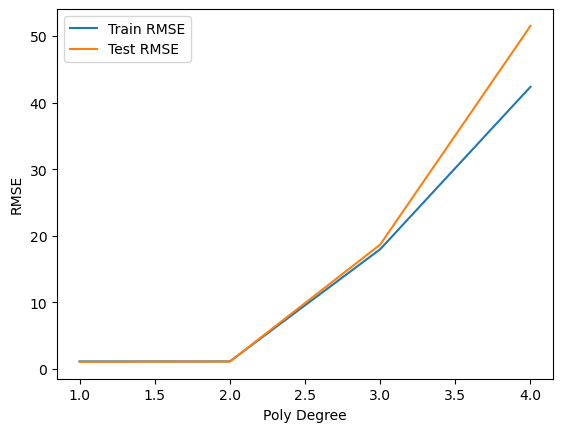

In [6]:
train_rmse_error = []
test_rmse_error = []
model = LinearRegression()
for degree in range(1, 8):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)

    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

plt.plot(range(1,5), train_rmse_error[:4], label='Train RMSE')
plt.plot(range(1,5), test_rmse_error[:4], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Poly Degree')
plt.legend()
plt.show()

In [7]:
poly_converter = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
test_prediction = model.predict(X_test)

MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 0.6110577943328662
RMSE: 1.0412791597852922


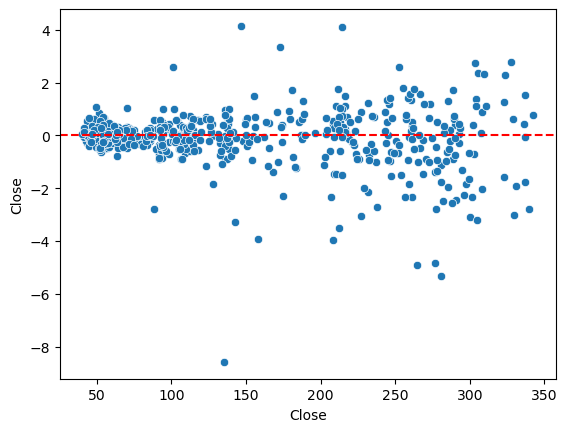

In [8]:
test_residuals = y_test - test_prediction
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')
plt.show()

In [9]:
# Model Regularization L1:
# 1. Perform Polynomial Regression machine learning on the features selected with the optimal degree you found on the previous exercise.
# 2. Perform feature scaling of type Standardization.
# 3. Perform Ridge Regression and examine15 different alpha values from range of 0.1 to 3 and scoring based on MAE (mean absolute error).
# 4. Find the optimal alpha value and print it.
# 5. Evaluate your Ridge model results with the optimal polynomial degree using MAE, MSE, RMSE error metrics.

In [10]:
poly_converter = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

LinearRegression()

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
ridge_cv_model = RidgeCV(alphas=(0.1, 3.0, 15.0), scoring='neg_mean_absolute_error')
ridge_cv_model.fit(scaled_X_train, y_train)
test_prediction = ridge_cv_model.predict(scaled_X_test)

MAE = mean_absolute_error(y_test, test_prediction)
RMSE = np.sqrt(mean_squared_error(y_test, test_prediction))

print(f'MAE: {MAE}')
print(f'RMSE: {RMSE}')

MAE: 0.6992745397246836
RMSE: 1.138868947558603


In [13]:
ridge_cv_model.alpha_

0.1

In [14]:
MAE = mean_absolute_error(y_test, test_prediction)
MSE = mean_squared_error(y_test, test_prediction)
RMSE = np.sqrt(MSE)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')

MAE: 0.6992745397246836
MSE: 1.29702247971324
RMSE: 1.138868947558603


In [15]:
# Model Deployment:
# 1. Once you are happy with your Ridge model results, train your Ridge Regression model on the entire polynomial dataset.
# Use the optimal polynomial degree and the optimal alpha value you found.
# 2. Print the final beta coefficient the model found for each feature.
# 3. Export your final model into a joblib file.
# Make sure you also export other relevant preprocessing instances such as the polynomial converter and the standard scaler.
# 4. Import your final model and the preprocessing instances from the joblib files and load them back to your working area.
# 5. Use the import model to predict the ‘close’ value of the following unknown data points:
# a. **Open:** 250.00, **High:** 255.00, **Low:** 249.50, **Volume:** 23,000,000
# b. **Open:** 260.00, **High:** 265.00, **Low:** 259.50, **Volume:** 21,500,000
# c. **Open:** 245.00, **High:** 250.00, **Low:** 244.50, **Volume:** 22,000,000

In [16]:
poly_converter = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly_converter.fit_transform(X)

scaler = StandardScaler()
scaler.fit(poly_features)
scaled_X = scaler.transform(poly_features)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(scaled_X, y)

Ridge(alpha=0.1)

In [17]:
ridge_model.coef_

array([-3.36324950e+01,  6.12327634e+01,  6.04276941e+01, -5.33148371e-02])

In [18]:
final_poly_scaled_ridge_model = ridge_model
final_scaler = scaler
final_poly_converter = poly_converter
dump(final_poly_scaled_ridge_model, 'final_poly_scaled_ridge_model.joblib')
dump(final_scaler, 'final_scaler.joblib')
dump(final_poly_converter, 'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [19]:
imported_final_poly_scaled_ridge_model = load('final_poly_scaled_ridge_model.joblib')
final_scaler = load('final_scaler.joblib')
final_poly_converter = load('final_poly_converter.joblib')

In [20]:
unknown_data = {
    'Open': [250.00, 260.00, 245.00],
    'High': [255.00, 265.00, 250.00],
    'Low': [249.50, 259.50, 244.50],
    'Volume': [23000000, 21500000, 22000000]
}
unknown_data_df = pd.DataFrame(unknown_data)
unknown_data_features = unknown_data_df[['Open', 'High', 'Low', 'Volume']]
unknown_data_features

,Open,High,Low,Volume
0,250.0,255.0,249.5,23000000
1,260.0,265.0,259.5,21500000
2,245.0,250.0,244.5,22000000


In [21]:
unknown_data_features_converted = final_poly_converter.fit_transform(unknown_data_features)

In [22]:
scaled_unknown_data_poly_features = final_scaler.transform(unknown_data_features_converted)

In [23]:
final_poly_scaled_ridge_model.predict(scaled_unknown_data_poly_features)

array([253.29777286, 263.31042102, 248.29812506])